In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Sample JSON configuration (replace this with your JSON data)
network_config = """
{
  "nodes": {
    "A": { "type": "manufacturer", "I": 30 },
    "B": { "type": "manufacturer", "I": 28 },
    "C": { "type": "manufacturer", "I": 32 },
    "D": { "type": "distributor" }
  },
  "edges": [
    { "source": "S", "target": "A", "L": 3 },
    { "source": "S", "target": "B", "L": 3 },
    { "source": "S", "target": "C", "L": 3 },
    { "source": "A", "target": "D", "L": 5 },
    { "source": "B", "target": "D", "L": 5 },
    { "source": "C", "target": "D", "L": 5 }
  ]
}
"""

In [4]:
# Load the JSON configuration
config = json.loads(network_config)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
for node, attributes in config['nodes'].items():
    graph.add_node(node, **attributes)

# Add edges to the graph with lead times
for edge in config['edges']:
    graph.add_edge(edge['source'], edge['target'], L=edge['L'])

# Example of accessing the graph data
print("Nodes:", graph.nodes(data=True))
print("Edges:", graph.edges(data=True))

Nodes: [('A', {'type': 'manufacturer', 'I': 30}), ('B', {'type': 'manufacturer', 'I': 28}), ('C', {'type': 'manufacturer', 'I': 32}), ('D', {'type': 'distributor'}), ('S', {})]
Edges: [('A', 'D', {'L': 5}), ('B', 'D', {'L': 5}), ('C', 'D', {'L': 5}), ('S', 'A', {'L': 3}), ('S', 'B', {'L': 3}), ('S', 'C', {'L': 3})]


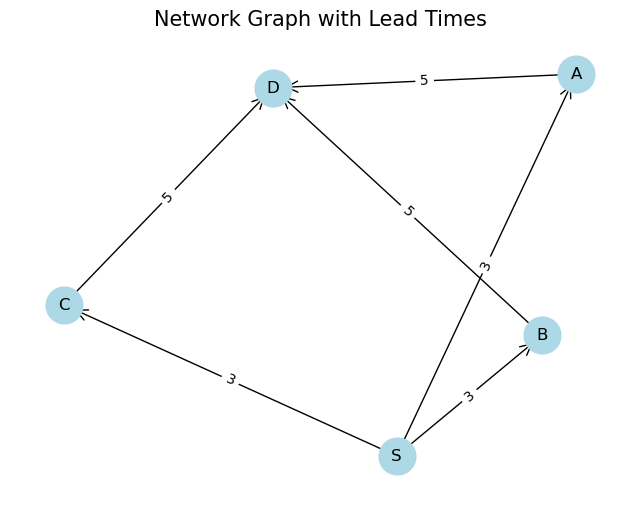

In [5]:
# Define the plot
plt.figure(figsize=(8, 6))

# Define the positions for nodes using a layout (spring layout is used here)
pos = nx.spring_layout(graph)

# Draw the nodes
nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='lightblue')

# Draw the edges
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), arrowstyle='->', arrowsize=20)

# Draw the node labels
nx.draw_networkx_labels(graph, pos, font_size=12, font_family="sans-serif")

# Extract the edge labels (lead times) and draw them
edge_labels = nx.get_edge_attributes(graph, 'L')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Set plot title
plt.title("Network Graph with Lead Times", fontsize=15)

# Display the plot
plt.axis('off')  # Turn off the axis
plt.show()